<a href="https://colab.research.google.com/github/weihanchen/google-colab-python-learn/blob/main/jupyter-examples/whisper_0_yt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 安裝相關套件
- openai-whisper: 安裝whisper語音辨識工具。
- pytube: 安裝youtube套件，這工具主要幫我們下載youtube影片進行後續的語音辨識demo，算是一個語音前處理工具。

In [8]:
# 安裝whisper語音辨識工具
!pip install -U openai-whisper

# 安裝youtube套件，這工具主要幫我們下載youtube影片進行後續的語音辨識demo，算是一個語音前處理工具
!pip install pytube

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 792.9/792.9 kB 50.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 87.7 MB/s eta 0:00:00
  Created wheel for openai-whisper: filename=openai_whisper-20230314-py3-none-any.whl size=796926 sha256=38a5654336d2778013da24e2842ba4e6e7a44197396c0fd6feaa47eb5f51f953
  Stored in directory: /root/.cache/pip/wheels/c4/85/e6/0bb9507b8e4f3f6d9c6dcf318bc3514739430375aa8e9eaf5b
Successfully built openai-whisper
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.2/57.2 kB 9.0 MB/s eta 0:00:00


## GPU模式確認
執行一下`!nvidia-smi`確定GPU環境是否運行。

In [9]:
!nvidia-smi

Sun Apr 23 08:05:56 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   44C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## 嘗試播放一段Youtube影片

這裡我們找了一段長約「3分30秒」的影片，https://www.youtube.com/watch?v=EYhlGV9AZHI
我們接著就來Google Colab播放試試看吧，我們將識別碼「`EYhlGV9AZHI`」帶入到YoutubeVideo函數進行播放，如果能夠成功播放代表影片存在。

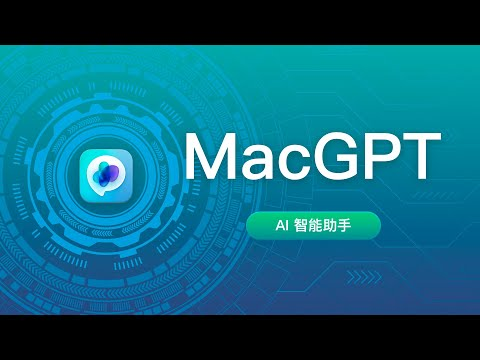

In [30]:
from IPython.display import YouTubeVideo

YouTubeVideo('EYhlGV9AZHI')

## 接著我們使用pytube來抓取影片資訊
這邊我們就取得`title`屬性並印出試試看

In [35]:
from pytube import YouTube

url = 'https://www.youtube.com/watch?v=EYhlGV9AZHI'

yt = YouTube(url)

# 抓取標題試試看
yt.title

'ChatGPT 怎麼又是你！？本想大聲斥責，但這個 App 實在太太太方便了 ~~ \uf8ff MacGPT'

## 下載純音檔

In [40]:
streams = yt.streams
audio = streams.get_audio_only()
obj = audio.download(filename='test.mp4')

## 載入辨識模型
要載入什麼樣的模型呢？可以看看官方網站的「[Available models and languages](https://github.com/openai/whisper#available-models-and-languages)」



In [41]:
import whisper

model = whisper.load_model('large')

100%|██████████████████████████████████████| 2.87G/2.87G [00:24<00:00, 124MiB/s]


## 對下載的音檔進行辨識

這邊我們就直接載入剛下載完成的`test.mp4`， 執行時間會有一些等待，這邊環境下大約等待1分鐘左右。


In [42]:
result = model.transcribe('test.mp4')

result

{'text': 'Hi 大家好今天要和大家分享一個很實用的小工具叫做 Mac GPT它巧妙的將 Chat GPT 強大的功能整合到 Mac 的操作介面讓我們的工作效率能得到空前的提升那要下載 Mac GPT我們可以到它的官網點擊 Download 按鈕它本身是一個免費的 App但如果你想要贊助 App 的作者也可以在欄位中輸入你要 Donate 的金額接著點擊底下的按鈕再輸入你的 Email 地址就可以把 Mac GPT 下載到自己的電腦推移到應用程式的資料夾那啟用 Mac GPT 之後你會看到一個跟 Chat GPT 相同的介面而在右上角有個齒輪按鈕點開它會打開 App 的設定對話框那這邊我們需要取得一個叫做 API 的密碼才能使用 Mac GPT 大部分的功能所以我來到 OpenAI 的官網選擇檢視 API 密鑰點擊建立如此我們就可以把產生的 API 密碼複製起來貼回到 Mac GPT 的介面那除此之外我們還必須在 OpenAI 的官網綁定一張信用卡許多人看到這可能會有些疑慮想說這費用會不會很昂貴但事實上 OpenAI 計費的方式很佛心如果我們跟 Chat GPT 用中文交談了一千個字只會花費 0.002 元美金甚至還不到台幣一塊錢所以其實還蠻划算的OK,只要設好了 API 密碼我們就可以切換到第二個標籤Mac GPT 啟用後會停住在 Mac 的選單列有需要的話你不妨可以設定一組快捷鍵之後就可以用快捷鍵快速叫出 Chat GPT 來進行發問那 Mac GPT 還有提供一個類似聊天 App 的介面如果你比較喜歡這個風格也可以使用這個介面來與 Chat GPT 交談喔OK,不過 Mac GPT 最方便的是它提供了一個類似 Spotlight 的搜尋欄那我們不需要開啟任何視窗就能向 Chat GPT 提問而這項功能我們同樣可以為它設定一個快捷鍵如此無論是在操作軟體或瀏覽網頁時只要按下快捷鍵就能像使用 Spotlight 那樣直接輸入我們的問題對於提升工作效率來說有很大的幫助喔OK,那 Mac GPT 最後一個很酷的功能是可以在任何文件或文字框內使用提示文字來叫出 Chat GPT這個功能在第一次使用時需要做一個安全性的授權我們要找到 Mac GPT把它的授權選項打開然後回到設定介面來勾選上面的方塊選項那這邊我們要指定一個叫出 Chat GPT 的關鍵詞開頭可以是加號

In [43]:
result['text']

'Hi 大家好今天要和大家分享一個很實用的小工具叫做 Mac GPT它巧妙的將 Chat GPT 強大的功能整合到 Mac 的操作介面讓我們的工作效率能得到空前的提升那要下載 Mac GPT我們可以到它的官網點擊 Download 按鈕它本身是一個免費的 App但如果你想要贊助 App 的作者也可以在欄位中輸入你要 Donate 的金額接著點擊底下的按鈕再輸入你的 Email 地址就可以把 Mac GPT 下載到自己的電腦推移到應用程式的資料夾那啟用 Mac GPT 之後你會看到一個跟 Chat GPT 相同的介面而在右上角有個齒輪按鈕點開它會打開 App 的設定對話框那這邊我們需要取得一個叫做 API 的密碼才能使用 Mac GPT 大部分的功能所以我來到 OpenAI 的官網選擇檢視 API 密鑰點擊建立如此我們就可以把產生的 API 密碼複製起來貼回到 Mac GPT 的介面那除此之外我們還必須在 OpenAI 的官網綁定一張信用卡許多人看到這可能會有些疑慮想說這費用會不會很昂貴但事實上 OpenAI 計費的方式很佛心如果我們跟 Chat GPT 用中文交談了一千個字只會花費 0.002 元美金甚至還不到台幣一塊錢所以其實還蠻划算的OK,只要設好了 API 密碼我們就可以切換到第二個標籤Mac GPT 啟用後會停住在 Mac 的選單列有需要的話你不妨可以設定一組快捷鍵之後就可以用快捷鍵快速叫出 Chat GPT 來進行發問那 Mac GPT 還有提供一個類似聊天 App 的介面如果你比較喜歡這個風格也可以使用這個介面來與 Chat GPT 交談喔OK,不過 Mac GPT 最方便的是它提供了一個類似 Spotlight 的搜尋欄那我們不需要開啟任何視窗就能向 Chat GPT 提問而這項功能我們同樣可以為它設定一個快捷鍵如此無論是在操作軟體或瀏覽網頁時只要按下快捷鍵就能像使用 Spotlight 那樣直接輸入我們的問題對於提升工作效率來說有很大的幫助喔OK,那 Mac GPT 最後一個很酷的功能是可以在任何文件或文字框內使用提示文字來叫出 Chat GPT這個功能在第一次使用時需要做一個安全性的授權我們要找到 Mac GPT把它的授權選項打開然後回到設定介面來勾選上面的方塊選項那這邊我們要指定一個叫出 Chat GPT 的關鍵詞開頭可以是加號、減號或斜線等此外